In [1]:
library(ggplot2)
library(datasets)
library(glmnet)
require(stats)
library(dplyr)

Loading required package: foreach
Loaded glmnet 2.0-16


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
#Based on the given spread sheet, two vectors are made to build the dataframe.
years = c(2010, 2011,2012,2013,2014,2015,2016)
population_UT = c(2775326, 2816124, 2855782, 2902663, 2941836, 2990632, 3051217)
df = data.frame(years, population_UT)

In [3]:
#Look at the dataframe.
df

years,population_UT
2010,2775326
2011,2816124
2012,2855782
2013,2902663
2014,2941836
2015,2990632
2016,3051217


In [4]:
#Check the structure of the variables from the dataframe.
str(df)

'data.frame':	7 obs. of  2 variables:
 $ years        : num  2010 2011 2012 2013 2014 ...
 $ population_UT: num  2775326 2816124 2855782 2902663 2941836 ...


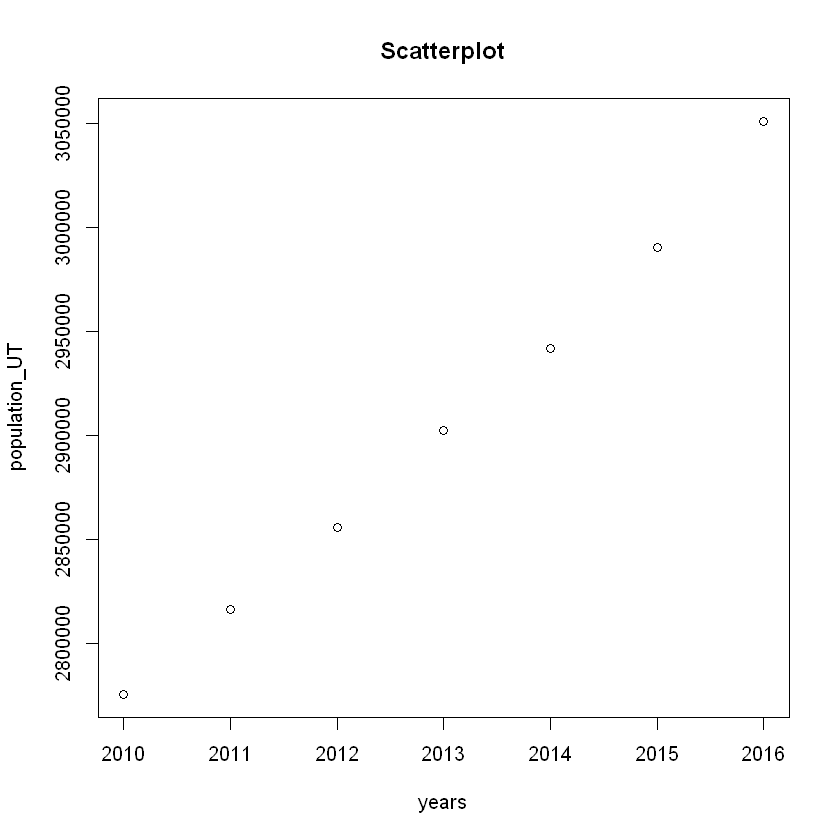

In [5]:
#Take a look at the plot made with the original data of the vectos. The scatterplot gives a positive pattern.
plot(years, population_UT, main = "Scatterplot")

In [6]:
#summarize the statistics of the whole data frame.
df %>% 
      summarize(mean_score = mean(population_UT), 
            median_score = median(population_UT),
            sd_score = sd(population_UT))

mean_score,median_score,sd_score
2904797,2902663,97648.19


In [7]:
#Create a new variable of population managing smaller numbers than the original. 
#Create a new dataframe with the new variable.
total_population = round(population_UT/1000000,2)
df_clean = df %>% mutate(total_population)

In [8]:
#Compute the correlation of the two vectos. 
#The correlation is almost 1 which means a strong positive correlation.
#This result agrees with the scatterplot.
df_clean %>% 
  summarize(correlation = round(cor(total_population, years),4))

correlation
0.9969


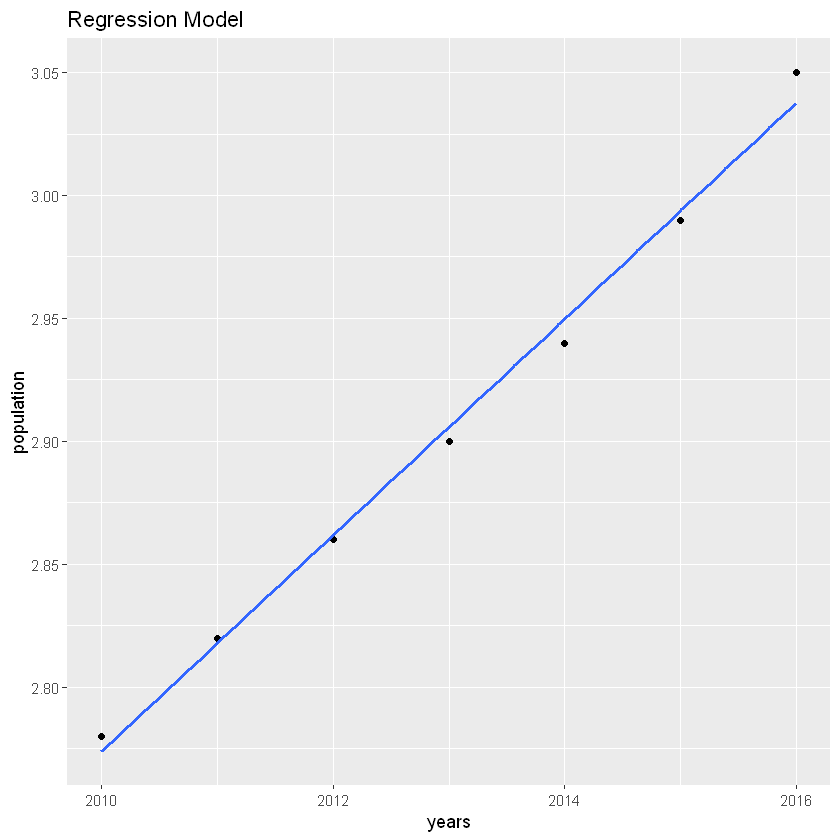

In [9]:
#Plot of the regression model with scatterplot 
ggplot(df_clean, aes(x = years, y = total_population)) +
  geom_point() + 
  labs(x = "years", y = "population", title = "Regression Model") +
  geom_smooth(method = "lm", se = FALSE)

In [10]:
#Save the regression model in a variable.
model_population_1 = lm(total_population ~ years, data = df_clean)

In [11]:
#check the regression line formula predicting population from 2014 year. 
#The 2014 result is 2.941836 which is close to the result.
predicted_population = round(-87.8774 + (0.0451*2014),4)
predicted_population

[1] 2.954

In [12]:
#The summary of the regression model where we can find coefficients, 
#and other information.
summary(model_population_1)


Call:
lm(formula = total_population ~ years, data = df_clean)

Residuals:
        1         2         3         4         5         6         7 
 0.006071  0.002143 -0.001786 -0.005714 -0.009643 -0.003571  0.012500 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -85.522500   3.133739  -27.29 1.24e-06 ***
years         0.043929   0.001557   28.22 1.05e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.008238 on 5 degrees of freedom
Multiple R-squared:  0.9938,	Adjusted R-squared:  0.9925 
F-statistic: 796.3 on 1 and 5 DF,  p-value: 1.047e-06


In [13]:
coef(model_population_1)

(Intercept)        years 
-85.52250000   0.04392857

In [14]:
confint(model_population_1)

,2.5 %,97.5 %
(Intercept),-93.57803136,-77.46696864
years,0.03992682,0.04793032


In [15]:
#prediction numbers from years 2020 to 2025.
predictions = predict(model_population_1, 
                      data.frame(years = c(2020,2021,2022,2023,2024,2025)), 
                      interval ="prediction", level = 0.95)